# **Multiple Linear Regression**
<hr>

Multiple Linear Regression is used to model the relationship is between two or more independent variables and one dependent variable.

### **Formula:**

$$
y = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 +  ...  + b_n \cdot x_n
$$

- **y** - Dependent Variable
- **x_n** - Independent Variables
- **b_0** - Constant
- **b_n** - Coefficient - The sign and the value of the coefficient indicate how much has relationship is and the direction of the relationship between a dependent variable and the independent 

**Assumptions of a Linear Regression:**
1. **Linearity:** There must be a linear relationship between the dependent variable and the independent variables. Scatterplots can show whether there is a linear or curvilinear relationship.
2. **Homoscedasticity:** This assumption states that the variance of error terms is similar across the values of the independent variables. A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.
3. **Multivariate normality:** Multiple Linear Regression assumes that the residuals (the differences between the observed value of the dependent variable y and the predicted value yˆ are normally distributed.
4. **Independence of errors:** Multiple Linear Regression assumes that the residuals (the differences between the observed value of the dependent variable y and the predicted value yˆ are independent.
5. **Lack of multicollinearity:** Multiple Linear Regression assumes that the independent variables are not highly correlated with each other. This assumption is tested using Variance Inflation Factor (VIF) values.

**In practice, we don't need to worry about these assumptions, when you try several regression models and the multiple linear regression performs poorly, it's because the data don't follow this assumption, and we have better algorithms to perform this task with greater accuracy.**

### **Dummy Variables Trap**
![](https://i.imgur.com/B5u1DHN.png)

In this case, b0 won't be the same whether we keep both dummy variables or one single dummy variable in the Multiple Linear Regression equation.

What is important to understand is that:

- if we have 2 dummy variables, then the value of one determines the value of the other;

- if we have 3 dummy variables (like 3 states), the values of two dummy variables determine the value of the third one;

- if we have n dummy variables, the values of n-1 dummy variables determine the value of the n-th one;

And the value of the last dummy variable, that is determined by the values of the other dummy variables and that is removed, is going include into the constant.

In other words, we always have omit one dummy variable in our dataset for each original feature.

### **5 methods of building models**
1. All-in
2. Backward Elimination
3. Forward Selection
4. Bidirecional Elimination
5. Score Comparation

## **Importing the libraries**
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**
<hr>

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

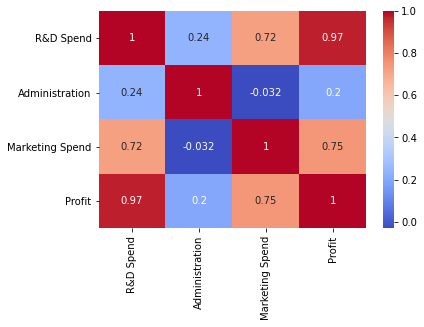

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

Since the "Marketing Spend" variable has a high correlation with "R&D Spend" we're going to remove the "Marketing Spend" column to avoid data redundancy. "Marketing Spend" was choose because has negative correlation with "Administration" and "R&D Spend" not.

In [5]:
df.drop(["Marketing Spend"], axis=1, inplace=True)

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
X

array([[165349.2, 136897.8, 'New York'],
       [162597.7, 151377.59, 'California'],
       [153441.51, 101145.55, 'Florida'],
       [144372.41, 118671.85, 'New York'],
       [142107.34, 91391.77, 'Florida'],
       [131876.9, 99814.71, 'New York'],
       [134615.46, 147198.87, 'California'],
       [130298.13, 145530.06, 'Florida'],
       [120542.52, 148718.95, 'New York'],
       [123334.88, 108679.17, 'California'],
       [101913.08, 110594.11, 'Florida'],
       [100671.96, 91790.61, 'California'],
       [93863.75, 127320.38, 'Florida'],
       [91992.39, 135495.07, 'California'],
       [119943.24, 156547.42, 'Florida'],
       [114523.61, 122616.84, 'New York'],
       [78013.11, 121597.55, 'California'],
       [94657.16, 145077.58, 'New York'],
       [91749.16, 114175.79, 'Florida'],
       [86419.7, 153514.11, 'New York'],
       [76253.86, 113867.3, 'California'],
       [78389.47, 153773.43, 'New York'],
       [73994.56, 122782.75, 'Florida'],
       [67532.53, 10575

In [8]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## **Encoding categorical data**
<hr>

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

                      #transformers = [(type, transformer, columns)], remainder= "drop" or "passthrough" 
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [2])], remainder="passthrough")
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8],
       [1.0, 0.0, 0.0, 162597.7, 151377.59],
       [0.0, 1.0, 0.0, 153441.51, 101145.55],
       [0.0, 0.0, 1.0, 144372.41, 118671.85],
       [0.0, 1.0, 0.0, 142107.34, 91391.77],
       [0.0, 0.0, 1.0, 131876.9, 99814.71],
       [1.0, 0.0, 0.0, 134615.46, 147198.87],
       [0.0, 1.0, 0.0, 130298.13, 145530.06],
       [0.0, 0.0, 1.0, 120542.52, 148718.95],
       [1.0, 0.0, 0.0, 123334.88, 108679.17],
       [0.0, 1.0, 0.0, 101913.08, 110594.11],
       [1.0, 0.0, 0.0, 100671.96, 91790.61],
       [0.0, 1.0, 0.0, 93863.75, 127320.38],
       [1.0, 0.0, 0.0, 91992.39, 135495.07],
       [0.0, 1.0, 0.0, 119943.24, 156547.42],
       [0.0, 0.0, 1.0, 114523.61, 122616.84],
       [1.0, 0.0, 0.0, 78013.11, 121597.55],
       [0.0, 0.0, 1.0, 94657.16, 145077.58],
       [0.0, 1.0, 0.0, 91749.16, 114175.79],
       [0.0, 0.0, 1.0, 86419.7, 153514.11],
       [1.0, 0.0, 0.0, 76253.86, 113867.3],
       [0.0, 0.0, 1.0, 78389.47, 153773.43],
     

- [0, 0, 1, ...] - New York
- [0, 1, 0, ...] - Florida
- [1, 0, 0, ...] - California

## **Splitting the dataset into the Training set and Test set**
<hr>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5 ,random_state=0)

## **Training the Multiple Linear Regression model on the Training set**
<hr>

Using scikit-learn we don't need to worry with **dummy variable trap** since that in the class it will be automatically outcaste. Furthermore, we don't have to apply manually the **backward elimination**, the class will choose the best features to our model.

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### **Getting the final linear regression equation with the values of the coefficients**

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[-2.19309465e+02  2.65423501e+02 -4.61140364e+01  8.51613579e-01
 -1.69679775e-03]
48663.83653587861


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = -219 \times \textrm{Dummy State 1} - 265 \times \textrm{Dummy State 2} -46.1 \times \textrm{Dummy State 3} + 0.852 \times \textrm{R&D Spend} - 0.0017 \times \textrm{Administration} + 48663.83$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

## **Predicting the Test set results**
<hr>

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(" Y - Test  | Y - Predict")
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), axis=1))

 Y - Test  | Y - Predict
[[103282.38 104869.72]
 [144259.4  134022.39]
 [146121.95 135532.17]
 [ 77798.83  72539.51]
 [191050.39 179430.51]
 [105008.31 109808.57]
 [ 81229.06  65733.62]
 [ 97483.56 100423.19]
 [110352.25 111735.69]
 [166187.94 169794.73]]


In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test, y_pred)

0.9477002402859026

## **Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')**
<hr>

In [16]:
print(regressor.predict([[1, 0, 0, 160000, 130000]]))

[184482.12]
